## Importing the Dependincies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Read Data Set

In [29]:
df = pd.read_csv('realtor-data.csv')
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [30]:
df.shape

(306000, 10)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,250076.0,3.491347,2.449591e+00,1.0,2.00,3.00,4.00,99.0
bath,251318.0,2.574726,2.568545e+00,1.0,2.00,2.00,3.00,198.0
acre_lot,239877.0,9.732298,5.308272e+02,0.0,0.16,0.43,1.59,100000.0
zip_code,305803.0,2552.165724,1.629820e+03,601.0,1605.00,2151.00,3052.00,99999.0
house_size,252557.0,2225.678298,3.665834e+03,100.0,1192.00,1748.00,2628.00,1450112.0
price,306000.0,768092.378265,1.297715e+06,1.0,249000.00,460000.00,799000.00,60000000.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306000 entries, 0 to 305999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          306000 non-null  object 
 1   bed             250076 non-null  float64
 2   bath            251318 non-null  float64
 3   acre_lot        239877 non-null  float64
 4   city            305948 non-null  object 
 5   state           306000 non-null  object 
 6   zip_code        305803 non-null  float64
 7   house_size      252557 non-null  float64
 8   prev_sold_date  109589 non-null  object 
 9   price           306000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 23.3+ MB


## Deleting Duplicated Rows and Handling Null Values 

In [33]:
df.duplicated().sum()

278154

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
print('Missing Values')
print(df.isnull().sum())
total_missing = df.isna().sum()*100/len(df)
print('Percentage Missing Value %')
total_missing

Missing Values
status                0
bed                6324
bath               6247
acre_lot           4387
city                 16
state                 0
zip_code             28
house_size         6168
prev_sold_date    17952
price                 0
dtype: int64
Percentage Missing Value %


status             0.000000
bed               22.710623
bath              22.434102
acre_lot          15.754507
city               0.057459
state              0.000000
zip_code           0.100553
house_size        22.150399
prev_sold_date    64.468864
price              0.000000
dtype: float64

In [36]:
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['acre_lot'].fillna(df['acre_lot'].median(), inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

df = df.dropna(subset=['zip_code','city'])
df = df.drop('prev_sold_date', axis=1)

In [37]:
print('Missing Values')
print(df.isnull().sum())
total_missing = df.isna().sum()*100/len(df)
print('Percentage Missing Value %')
total_missing

Missing Values
status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64
Percentage Missing Value %


status        0.0
bed           0.0
bath          0.0
acre_lot      0.0
city          0.0
state         0.0
zip_code      0.0
house_size    0.0
price         0.0
dtype: float64

## Feature Extraction

In [38]:
df['house_count_city'] = df.groupby('city')['city'].transform('count')
df['total_rooms'] = df['bath'] + df['bed']

### EDA (Exploratory Data Analysis)

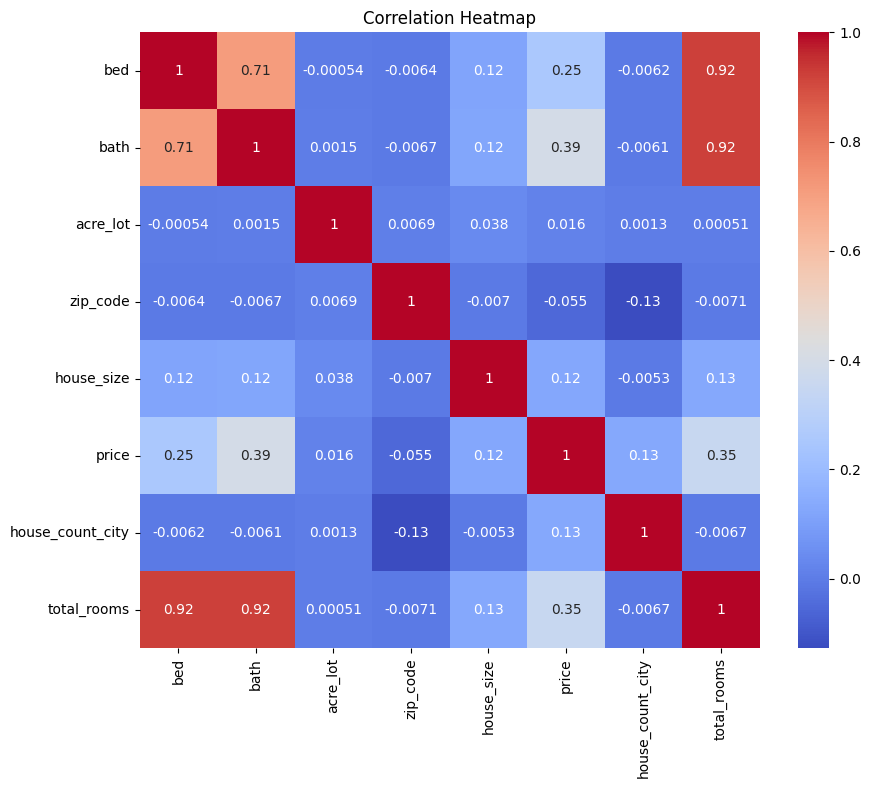

In [39]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price,house_count_city,total_rooms
count,27817.000000,27817.000000,27817.000000,27817.000000,2.781700e+04,2.781700e+04,27817.000000,27817.000000
mean,3.393680,2.455117,18.708230,3345.988856,2.051664e+03,6.990911e+05,133.772549,5.848797
std,1.918604,1.919619,1051.451697,2531.165303,8.898654e+03,1.385125e+06,251.055306,3.549225
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00,1.000000,2.000000
25%,3.000000,2.000000,0.230000,1845.000000,1.200000e+03,2.000000e+05,27.000000,5.000000
50%,3.000000,2.000000,0.530000,2831.000000,1.440000e+03,3.850000e+05,57.000000,5.000000
75%,4.000000,3.000000,1.500000,4074.000000,2.324000e+03,6.950000e+05,112.000000,6.000000
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07,1228.000000,297.000000


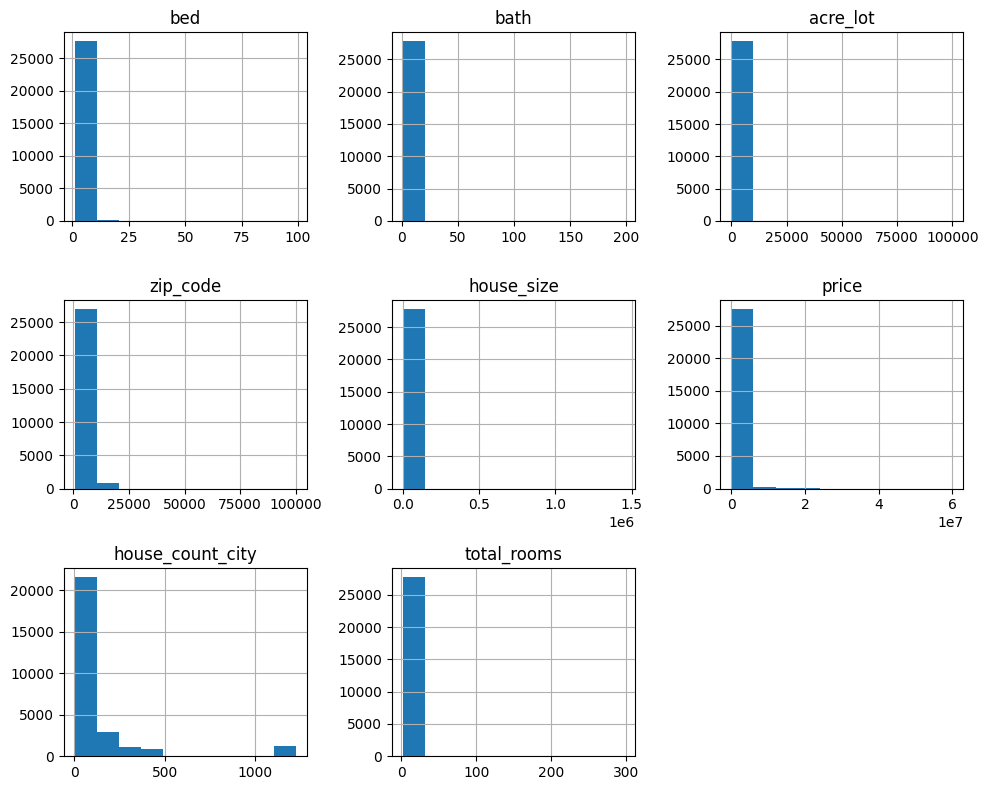

In [41]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

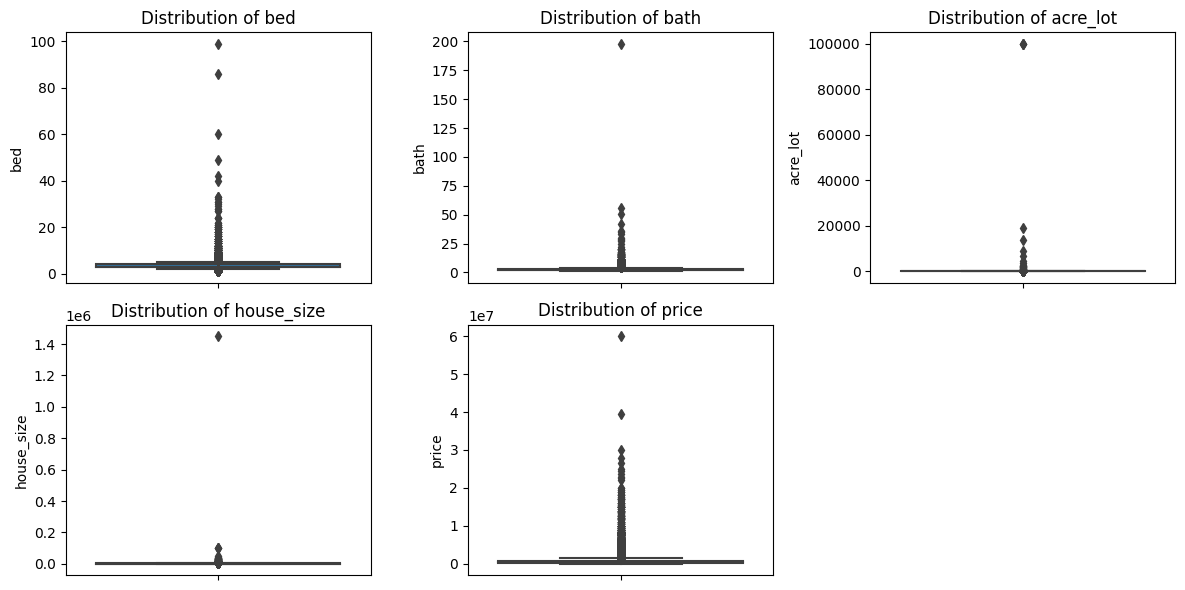

In [42]:
columns_for_outliers = ['bed', 'bath', 'acre_lot', 'house_size','price']

plt.figure(figsize=(12, 6))    
for i, col in enumerate(columns_for_outliers):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Drop Outliers

In [43]:
def outlier_treatment(datacolumn):
    """function to Remove outlier"""
    datacolumn = sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[40,60])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range,IQR

In [44]:
def count_outliers(feature):
    l, u, IQR = outlier_treatment(df[feature])
    count = 0
    if IQR != 0:
        count += len(df[(df[feature] > u) | (df[feature] < l)])
    print("lower: ",l,"- upper: ", u)
    print("will be dropped: ",count)
    return count

In [45]:
def drop_outliers(feature):
    l,u, IQR = outlier_treatment(df[feature])
    if IQR!=0:
        df.drop(df[ (df[feature] > u) | (df[feature] < l)].index,inplace=True)

In [46]:
for column in columns_for_outliers:
    print(column)
    count_outliers(column)

bed
lower:  3.0 - upper:  3.0
will be dropped:  0
bath
lower:  2.0 - upper:  2.0
will be dropped:  0
acre_lot
lower:  0.31 - upper:  0.79
will be dropped:  18643
house_size
lower:  408.0 - upper:  2520.0
will be dropped:  6015
price
lower:  31500.0 - upper:  747500.0
will be dropped:  6629


In [48]:
drop_outliers("house_size")
drop_outliers("price")

In [49]:
df.shape

(9712, 11)

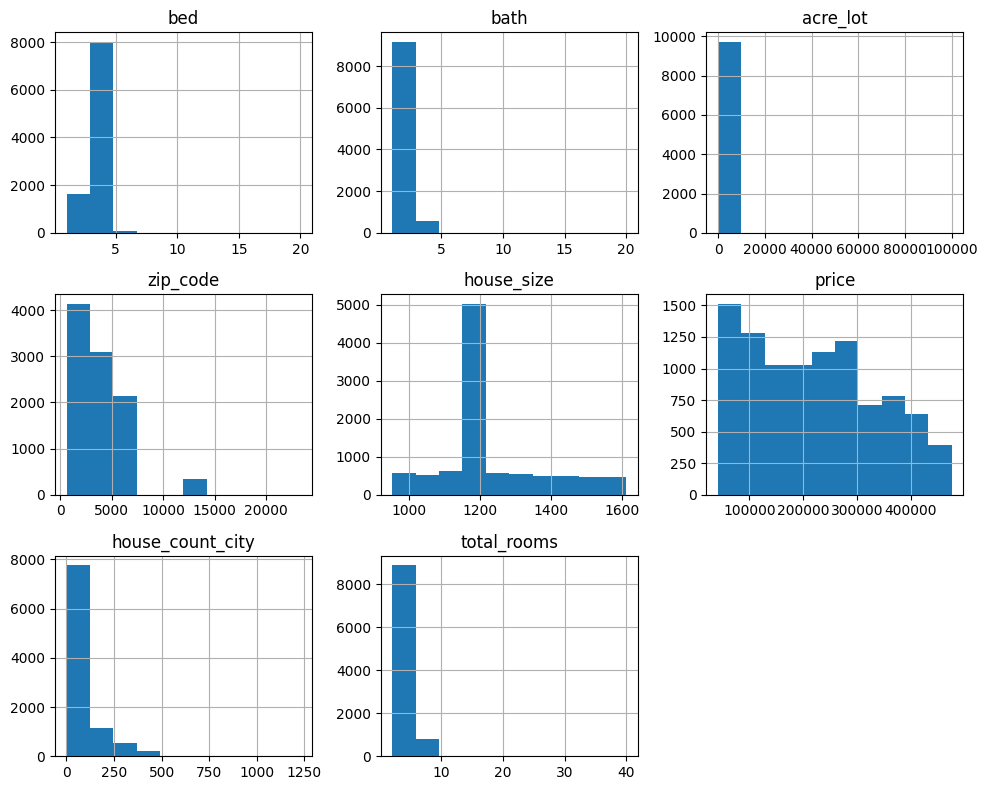

In [50]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

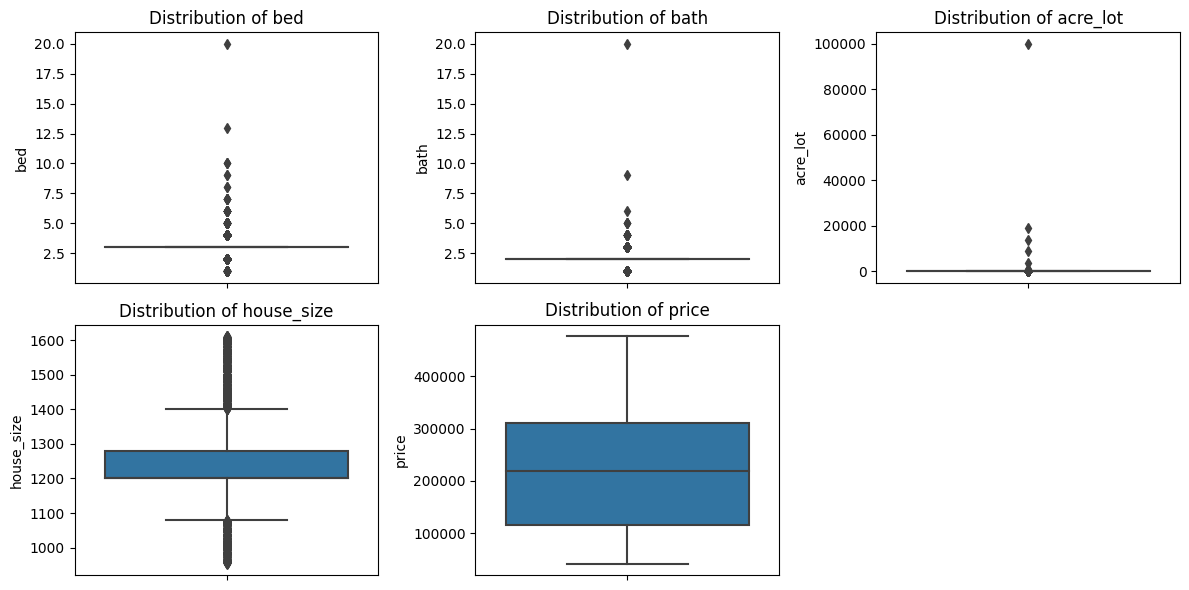

In [51]:
plt.figure(figsize=(12, 6))    
for i, col in enumerate(columns_for_outliers):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,9712.0,2.915054,0.603334,1.0,3.00,3.00,3.00,20.0
bath,9712.0,1.893019,0.519405,1.0,2.00,2.00,2.00,20.0
acre_lot,9712.0,20.026058,1046.547361,0.0,0.27,0.53,2.45,99999.0
zip_code,9712.0,3564.550865,2525.990070,601.0,1453.00,2919.00,5301.00,23336.0
house_size,9712.0,1236.668760,142.032669,953.0,1200.00,1200.00,1280.00,1612.0
price,9712.0,221101.062809,117985.346956,41500.0,115000.00,218944.00,311136.00,476377.0
house_count_city,9712.0,85.409802,102.719781,1.0,25.00,52.00,106.00,1228.0
total_rooms,9712.0,4.808072,0.897040,2.0,4.00,5.00,5.00,40.0


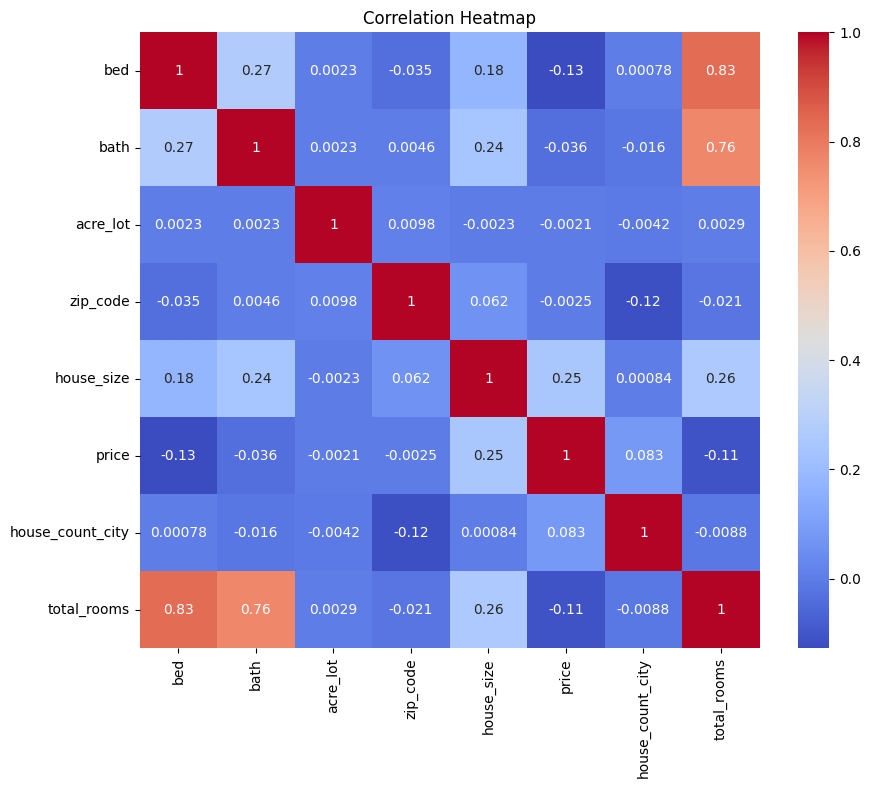

In [53]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Label Encoding

In [57]:
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df['city'] = le.fit_transform(df['city'])
df['state'] = le.fit_transform(df['state'])

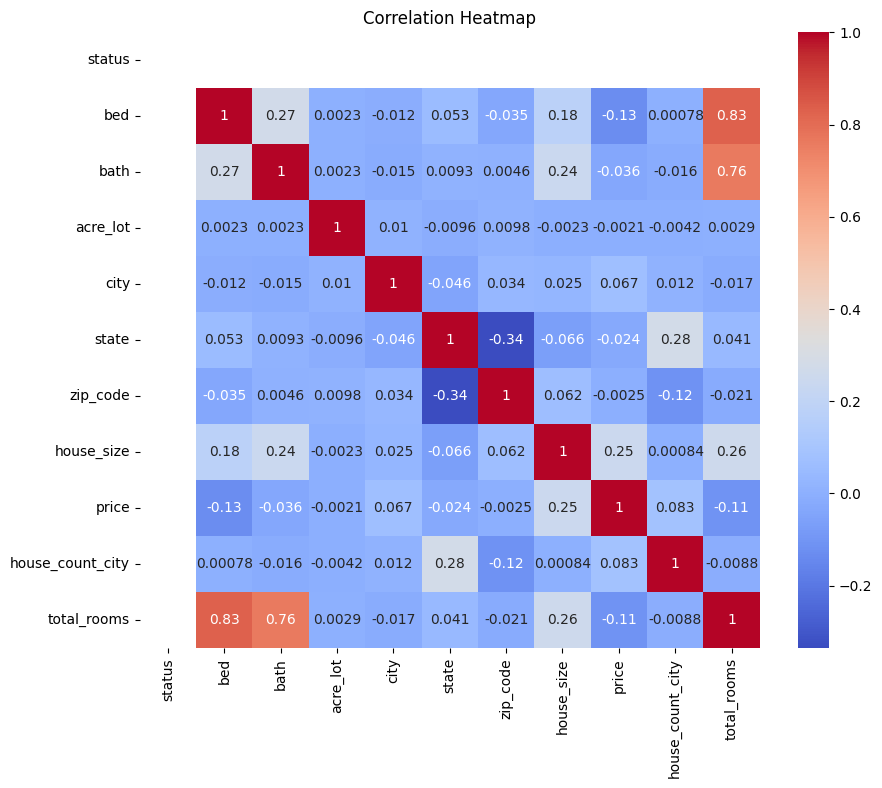

In [58]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Splitting Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df,)

## Training Model